In [35]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay=cv2.imread('../DATA/solvay_conference.jpg',0)

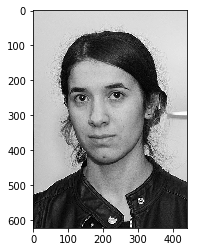

In [37]:
plt.imshow(nadia,cmap='gray')

In [38]:
face_cascade =cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [51]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [52]:
result = detect_face(solvay)

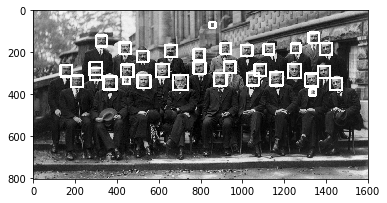

In [53]:
plt.imshow(result,cmap='gray')

In [54]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2,minNeighbors =5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [55]:
result=adj_detect_face(solvay)

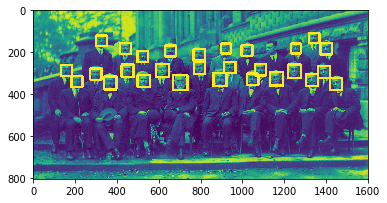

In [56]:
plt.imshow(result)

In [57]:
eye_cascade =cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [58]:
def detect_eyes(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img,scaleFactor =1.2,minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

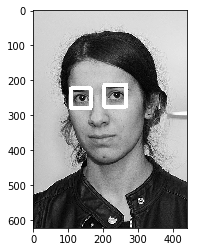

In [59]:
result =detect_eyes(nadia)
plt.imshow(result,cmap='gray')

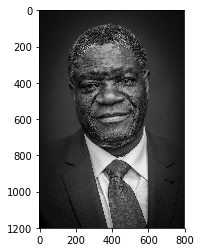

In [60]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [64]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()